In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
%matplotlib inline
import os

In [2]:
os.chdir('C:\Digital Engineering\Gender Detection')

In [4]:
# load numpy zip
data = np.load('./data_10000_norm.npz')

In [5]:
data.files

['arr_0', 'arr_1']

In [6]:
X=data['arr_0']   # independent features
y=data['arr_1']   #  target value

In [7]:
X.shape, y.shape

((5465, 10000), (5465,))

# Eigen Image

In [8]:
# Subtracting all the columns with mean
X1= X-X.mean(axis=0)

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=None, whiten=True, svd_solver= 'auto')

In [11]:
x_pca=pca.fit_transform(X1)

In [12]:
x_pca.shape
#reduced no. of components to row size since solver is auto

(5465, 5465)

In [13]:
eigen_ratio=pca.explained_variance_ratio_
eigen_ratio_cum=np.cumsum(eigen_ratio)

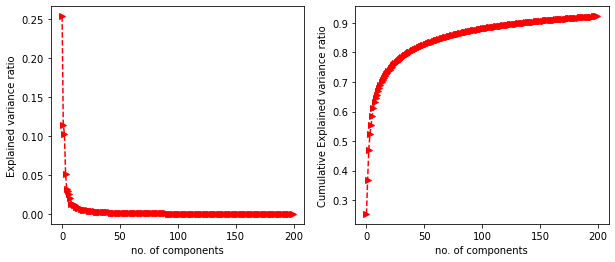

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no. of components')
plt.ylabel('Explained variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no. of components')
plt.ylabel('Cumulative Explained variance ratio')
plt.plot(eigen_ratio_cum[:200],'r>--')

## Conclusion

Using Elbow Method if we consider no. of components between 25-30 the explained variance ratio is 75%. 
We will take 50 no. of components in order to get min 80 %.
In reality need to consider 75-80 % variace.

In [15]:
pca_50 = PCA(n_components=50, whiten=True, svd_solver= 'auto')
x_pca_50=pca_50.fit_transform(X1)

In [16]:
x_pca_50.shape

(5465, 50)

In [17]:
# saving pca
import pickle

In [18]:
pickle.dump(pca_50,open('./model/pca_50.pickle','wb'))

In [19]:
x_pca_inv= pca_50.inverse_transform(x_pca_50)

In [20]:
x_pca_inv.shape

(5465, 10000)

In [21]:
x_pca_inv

array([[ 0.28633663,  0.30284696,  0.31063058, ...,  0.0485953 ,
         0.04876666,  0.04580072],
       [-0.29337659, -0.29494563, -0.29357367, ..., -0.31346826,
        -0.32155985, -0.33036346],
       [-0.15656681, -0.16790277, -0.17881791, ...,  0.17092565,
         0.17149091,  0.16415756],
       ...,
       [-0.26366868, -0.24769408, -0.23106776, ..., -0.19530415,
        -0.19606382, -0.20224826],
       [-0.25378654, -0.26175117, -0.25968185, ..., -0.16783421,
        -0.16063147, -0.15492781],
       [-0.32811728, -0.33569949, -0.35651938, ...,  0.05141473,
         0.03539751,  0.02256594]])

In [22]:
x_pca_inv[0,:]

array([0.28633663, 0.30284696, 0.31063058, ..., 0.0485953 , 0.04876666,
       0.04580072])

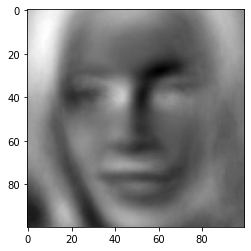

In [23]:
# consider one image (one row)
eig_img= x_pca_inv[0,:]
eig_img=eig_img.reshape(100,100)
plt.imshow(eig_img, cmap='gray')

In [24]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'

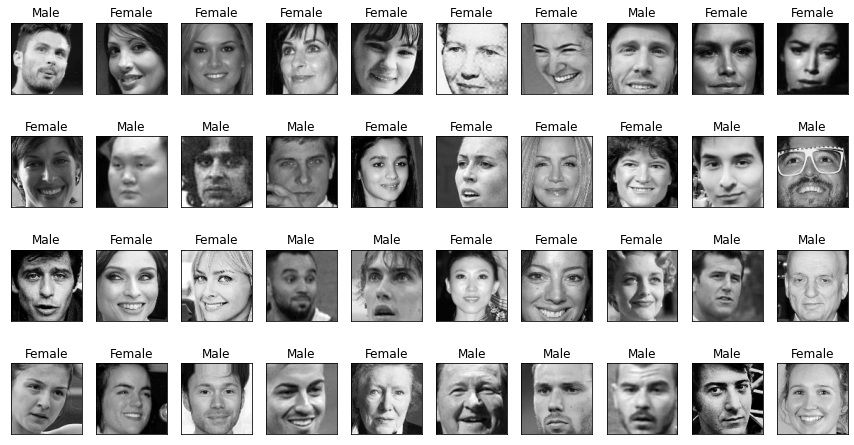

====================Eigen Images====================


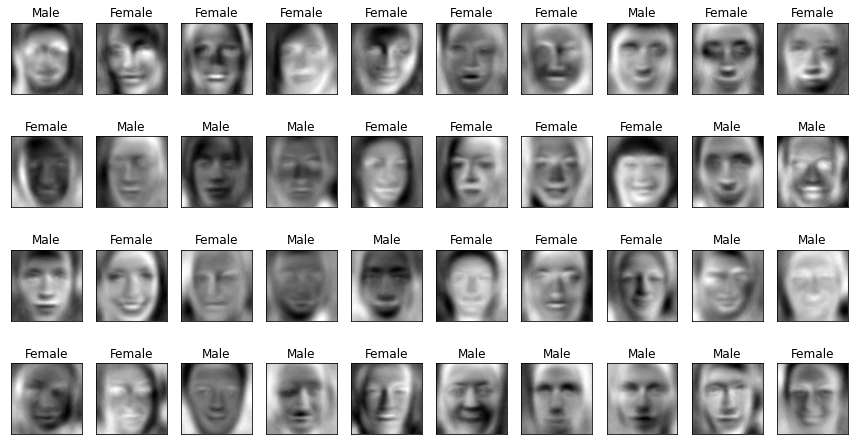

In [25]:
np.random.randint(1001)
pics = np.random.randint(0,5451,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [27]:
# savez
np.savez('./data_pca_50_y_mean.pickle',x_pca_50,y,X.mean(axis=0))